In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
train_data=pd.read_excel(r"C:\Users\ishan\Desktop\Flight Price Prediction\Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
# null values are really less so it wont have any effect 
# on the overall score of the model
# so we can drop them
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
# creating a copy of data
data=train_data.copy()

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# performing pre-processing on "Date_of_Journey" column. 
# goal is to convert it to 3 different columns- 
# journey_day, journey_month, journey_year

In [15]:
# function to convert data type of all date columns from object to datetime
def change_into_Datetime(col):
    data[col]=pd.to_datetime(data[col])

In [16]:
# disabling warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [20]:
# adding columns to dataset
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month
data['Journey_year']=data['Date_of_Journey'].dt.year

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-14 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-14 05:50:00,2024-03-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-14 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-03-14 18:05:00,2024-03-14 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-03-14 16:50:00,2024-03-14 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [22]:
# performing pre-processing on "Dep_Time" column
# goal is to convert it to 2 different columns- 
# dep_time_hour and dep_time_minute
# we dont need to extract date because we have already extracted it 
# in the previous step
# same will be done for Arrival_Time column

In [23]:
# function to do the above mentioned task
def extract_hour_min(df, col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    return df.head()

In [24]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-14 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-14 05:50:00,2024-03-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-14 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-03-14 18:05:00,2024-03-14 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-03-14 16:50:00,2024-03-14 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [25]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-14 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-14 05:50:00,2024-03-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-14 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-03-14 18:05:00,2024-03-14 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-03-14 16:50:00,2024-03-14 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [26]:
# dropping unnessary columns
columns_to_drop=['Dep_Time', 'Arrival_Time', 'Date_of_Journey']
data.drop(columns_to_drop, axis=1, inplace=True)

In [27]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [28]:
data.shape

(10682, 15)

In [29]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

In [30]:
# data analysis
# converting Dep_Time_hour column values to form- 
# 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night'
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return 'Early Morning'
    if(x>8) and (x<=12):
        return 'Morning'
    if(x>12) and (x<=16):
        return 'Noon'
    if(x>16) and (x<=20):
        return 'Evening'
    if(x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [31]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [32]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

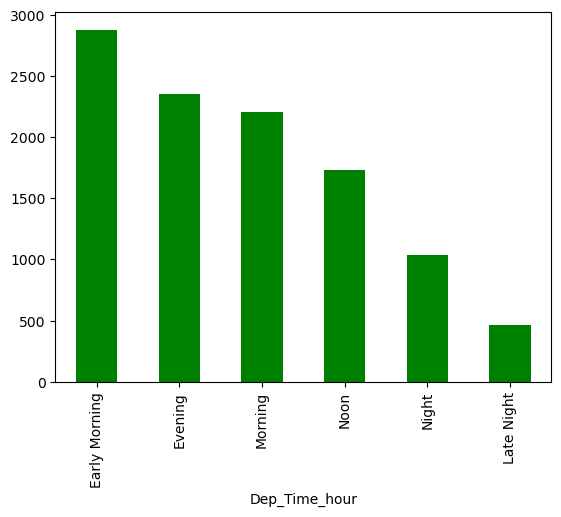

In [33]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='g')

In [34]:
# analysing whether duration feature impacts price or not

In [35]:
# converting Duration column values to 2 different columns-
# Duration_hour, Duration_minute
# also need to modify existing Duration values to incorporate both h and m values
def preprocess_duration(x):
    if 'h' not in x:
        x='0h'+' '+x
    elif 'm' not in x:
        x=x+' '+'0m'
    return x

In [36]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [37]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [38]:
data['Duration_hour']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [39]:
data['Duration_minute']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [40]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [41]:
data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1')

0        2*60+50*1
1        7*60+25*1
2        19*60+0*1
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680     3*60+0*1
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [42]:
data['Duration_total_minutes']=data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [43]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285


In [44]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Duration_total_minutes'],
      dtype='object')

<Axes: xlabel='Duration_total_minutes', ylabel='Price'>

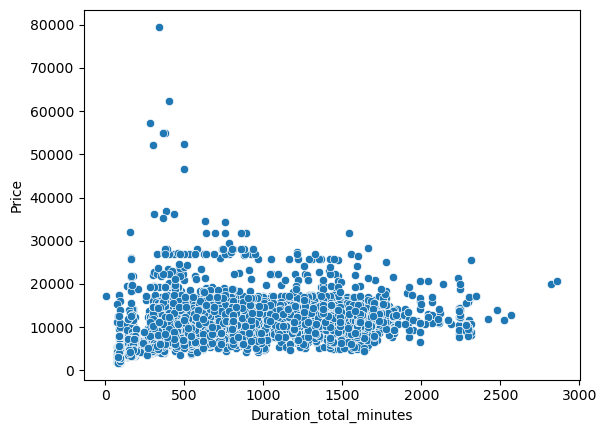

In [45]:
sns.scatterplot(x='Duration_total_minutes', y='Price', data=data)

<Axes: xlabel='Duration_total_minutes', ylabel='Price'>

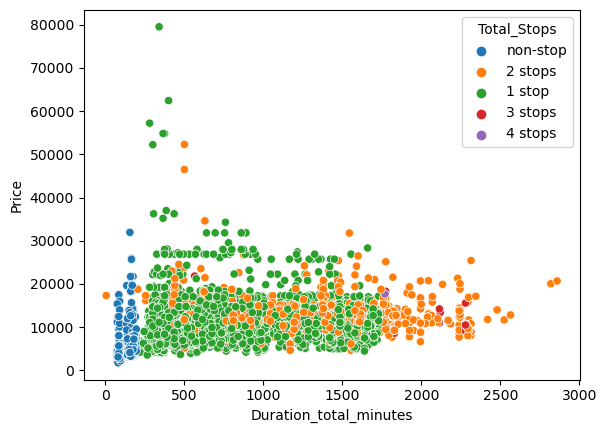

In [46]:
sns.scatterplot(x='Duration_total_minutes', y='Price', hue="Total_Stops", data=data)

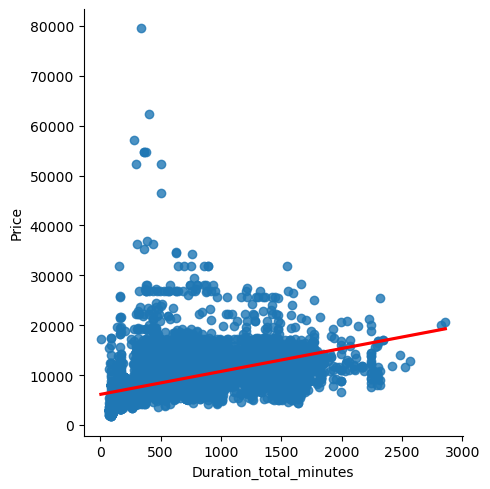

In [47]:
sns.lmplot(x='Duration_total_minutes', y='Price', data=data, line_kws={'color': 'red'})

In [48]:
# by analysing the regression line we can say that-
# as duration increases price also increases

In [49]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285


In [50]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Duration_total_minutes'],
      dtype='object')

In [51]:
# category columns
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [52]:
# numerical columns
num_col=[col for col in data.columns if data[col].dtype!='object']

In [53]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [54]:
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute',
 'Duration_total_minutes']

In [55]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [56]:
# applying feature encoding on 'Source' column

In [57]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [58]:
# applying one-hot encoding from scratch
for sub_category in data['Source'].unique():
    data['Source_'+sub_category]=data['Source'].apply(lambda x:1 if x==sub_category else 0)

In [59]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,...,21,35,4,45,285,1,0,0,0,0


In [60]:
# we can apply target guided encoding on 'Airline' column using 'Price' column

In [61]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [62]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [63]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [64]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}

In [65]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [66]:
data['Airline']=data['Airline'].map(dict_airlines)

In [67]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,...,21,35,4,45,285,1,0,0,0,0


In [68]:
# applying target guided encoding on 'Destination' column also

In [69]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [70]:
# replacing New Delhi with Delhi
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [71]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [72]:
destination=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [73]:
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [74]:
dict_dest={key:index for index,key in enumerate(destination,0)}

In [75]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [76]:
data['Destination']=data['Destination'].map(dict_dest)

In [77]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,...,21,35,4,45,285,1,0,0,0,0


In [78]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [79]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Duration_total_minutes', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [80]:
# applying label encoding in the above ordinal data ('Total_Stops')

In [81]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [82]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [83]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [84]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,...,21,35,4,45,285,1,0,0,0,0


In [85]:
# we can drop 'Additional_Info' feature as it plays not role in price prediction
data['Additional_Info'].value_counts()/len(data)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: count, dtype: float64

In [86]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hour', 'Duration_minute',
       'Duration_total_minutes', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [87]:
# we can also drop 'Route' feature as its information is already included in Total_Stops feature
# similarly we can also drop 'Duration_total_minutes' feature too
# also dropping Source feature since we did one-hot encoding for the same
data.drop(columns=['Additional_Info', 'Duration_total_minutes', 'Source'], axis=1, inplace=True)

In [88]:
data['Journey_year'].unique()

array([2019])

In [89]:
# we can also drop 'Journey_year' since its value is constant for all entire data
data.drop(columns=['Journey_year'], axis=1, inplace=True)

In [90]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [91]:
data.head()

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,BLR → NAG → DEL,4h 45m,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


In [92]:
# also dropping 'Route' feature
data.drop(columns=['Route'], axis=1, inplace=True)

In [93]:
data.head()

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,4h 45m,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


In [94]:
# 'Duration' feature can also be dropped as we extracted hour and min information from it already
data.drop(columns=['Duration'], axis=1, inplace=True)

In [95]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


In [96]:
# handling outliers

In [97]:
def plot(df, col):
    fig, (ax1, ax2, ax3)=plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

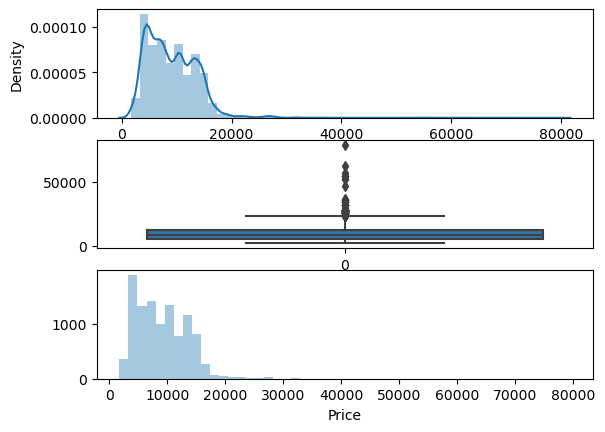

In [98]:
plot(data, 'Price')

In [99]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr

In [100]:
# listing outliers
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [101]:
# we can replace all outlier values with price median
data['Price']=np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

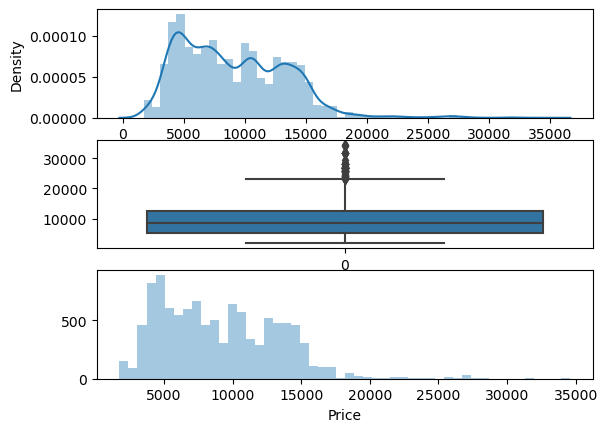

In [102]:
plot(data,'Price')

In [103]:
# splitting data into dependent and independent variables
x=data.drop(['Price'], axis=1)
y=data['Price']

In [104]:
from sklearn.feature_selection import mutual_info_regression

In [105]:
imp=mutual_info_regression(x,y)

In [106]:
imp

array([0.97968586, 1.00356282, 0.78440069, 0.23607703, 0.62089276,
       0.34362625, 0.26216651, 0.39484216, 0.34630063, 0.46461472,
       0.34190239, 0.38624501, 0.45533428, 0.52510592, 0.12519164,
       0.2096057 ])

In [107]:
imp_df=pd.DataFrame(imp, index=x.columns)

In [108]:
imp_df.columns=['Importance']

In [109]:
imp_df

,Importance
Airline,0.979686
Destination,1.003563
Total_Stops,0.784401
Journey_day,0.236077
Journey_month,0.620893
Dep_Time_hour,0.343626
Dep_Time_minute,0.262167
Arrival_Time_hour,0.394842
Arrival_Time_minute,0.346301
Duration_hour,0.464615


In [110]:
imp_df.sort_values(by='Importance', ascending=False)

,Importance
Destination,1.003563
Airline,0.979686
Total_Stops,0.784401
Journey_month,0.620893
Source_Delhi,0.525106
Duration_hour,0.464615
Source_Kolkata,0.455334
Arrival_Time_hour,0.394842
Source_Banglore,0.386245
Arrival_Time_minute,0.346301


In [111]:
# since we dont have many features and all existing feature have their 
# own contribution to price prediction so wont be dropping any of them

In [112]:
# splitting data into train and test subsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [113]:
x_train.shape

(7156, 16)

In [114]:
x_test.shape

(3526, 16)

In [115]:
y_train.shape

(7156,)

In [116]:
y_test.shape

(3526,)

In [117]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [118]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [119]:
model.score(x_test,y_test)

0.8175680807500398

In [120]:
y_pred=model.predict(x_test)

In [121]:
y_pred

array([16764.61      ,  5405.39      ,  8876.99      , ...,
        8091.84      ,  9188.49      , 12094.17416667])

In [122]:
# model is 81% accurate which is a good score